<a href="https://colab.research.google.com/github/SampannaMishra/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date :  days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.
* ### Temperature-Temperature in Celsius, type : Float
* ### Humidity - Humidity in the air in %, type : int
* ### Windspeed - Speed of the wind in m/s, type : Float
* ### Visibility - Visibility in m, type : int
* ### Dew point temperature - Temperature at the beggining of the day, type : Float
* ### Solar radiation - Sun contribution (MJ/m2), type : Float 
* ### Rainfall - Amount of raining in mm, type : Float
* ### Snowfall - Amount of snowing in cm, type:  Float
* ### Seasons - Season of the year, type : str, there are only 4 season's in data(Winter, Spring, Summer, Autumn)
* ### Holiday -If the day is holiday period or not, type: str 
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# reading the csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone project/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')


In [13]:
data.shape

(8760, 14)

In [14]:
# glimpse of first 5 rows of dataset
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
# glimpse of last 5 rows
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [16]:
# summary of the datatypes used in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Data Preprocessing**

In [17]:
# checking for null values
data.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [18]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


### In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

**Breaking the data column into hour , month, day**

In [19]:
# converting the Date column which is present in string format  to date time format using to_datetime function 
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [20]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


Since the data contains the information of a year starting from 2017 till 2018 so year column wouldnot be much significant in analysis.It can be dropped.

Also information about the week days from day column should be identified. Further dropping the day column. 

In [21]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekday_filter']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','day','year'],axis=1)

In [22]:
data.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday_filter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [23]:
# change datatype from integer to categorical
data['Hour'] = data['Hour'].astype('category')
data['month'] = data['month'].astype('category')
data['weekday_filter'] = data['weekday_filter'].astype('category')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

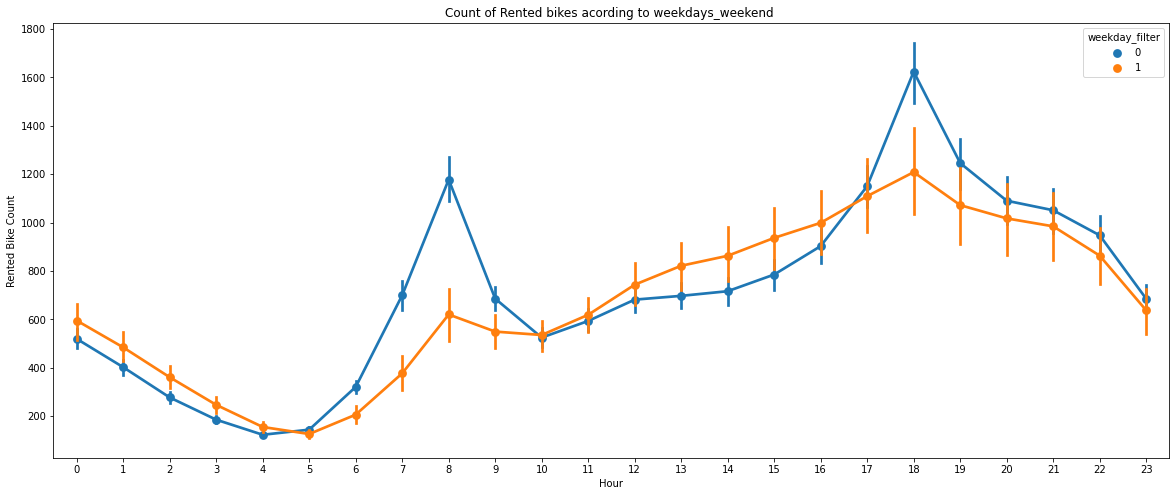

In [25]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented Bike Count',hue='weekday_filter',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

From the above point plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm. The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

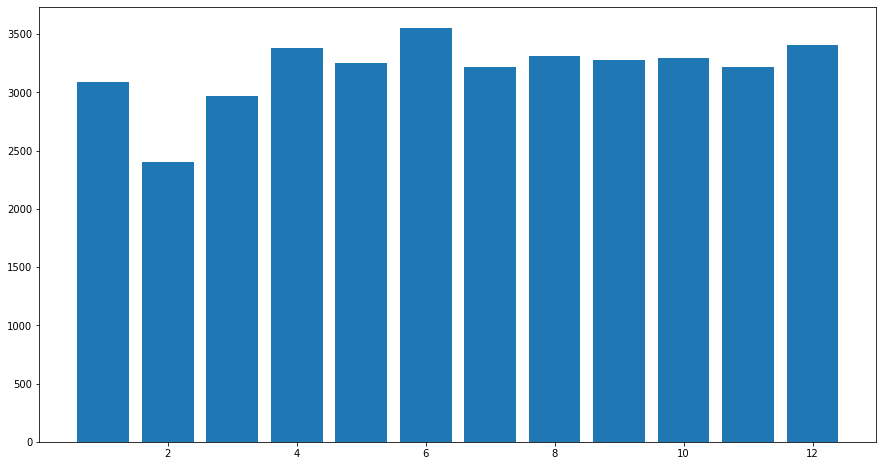

In [26]:
plt.figure(figsize=(15,8))
plt.bar(x='month',height='Rented Bike Count',data = data)
plt.show()

June month has the highest rented bike count followed by april and december.

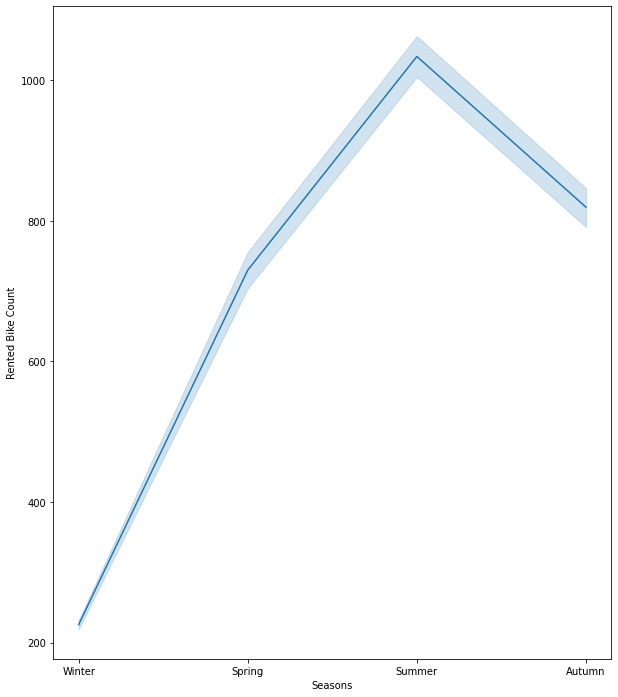

In [27]:
plt.figure(figsize = (10,12))
sns.lineplot(data=data, x="Seasons", y="Rented Bike Count")

Rented Bike Count is highest in month of Summer and lowest in winter season. This might be because due to harsh weather conditions in winter people dont prefer to travel in bike.

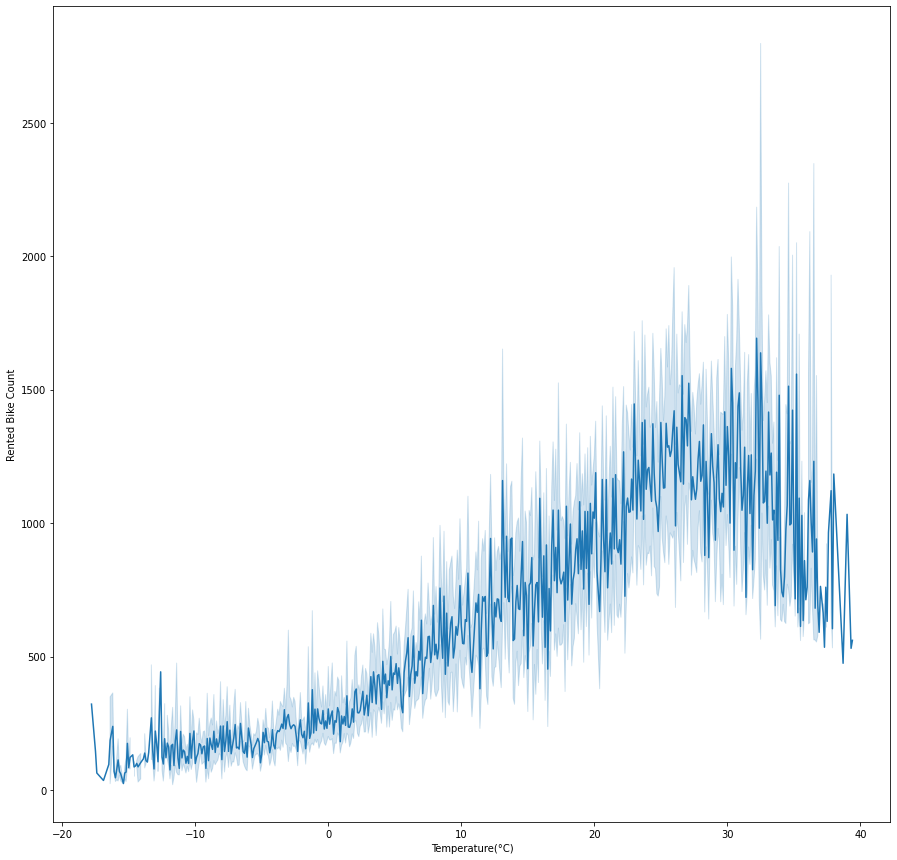

In [28]:
plt.figure(figsize = (15,15))
sns.lineplot(data=data, x="Temperature(°C)", y="Rented Bike Count")

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

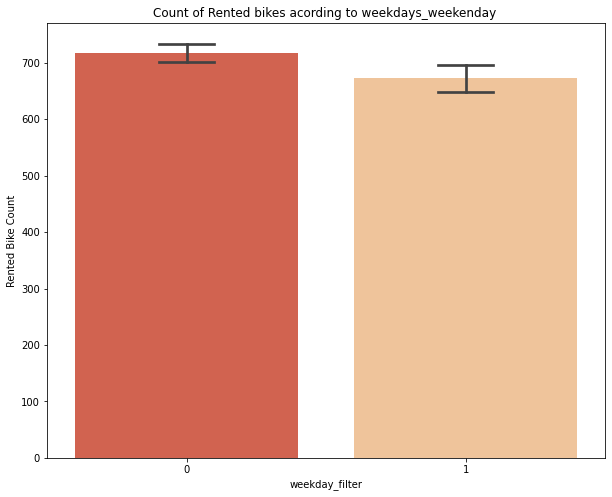

In [31]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekday_filter',y='Rented Bike Count',palette='OrRd_r',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

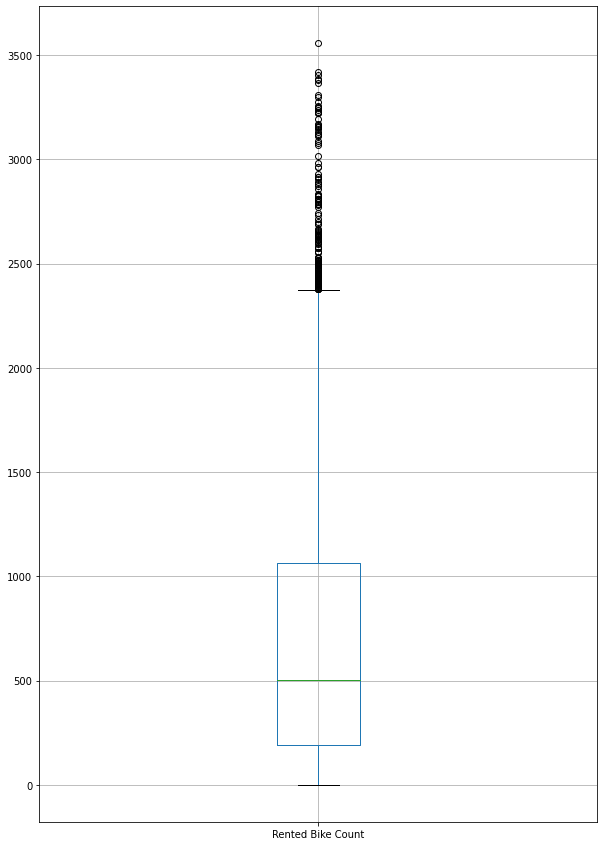

In [32]:
# box plot showing outliers in Rented Bike Count
plt.figure(figsize=(10,15))
data.boxplot(column='Rented Bike Count')
plt.show()

From the above boxplot outliers can be detected in the values. Which should be removed before performing the regression analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rented Bike Count')

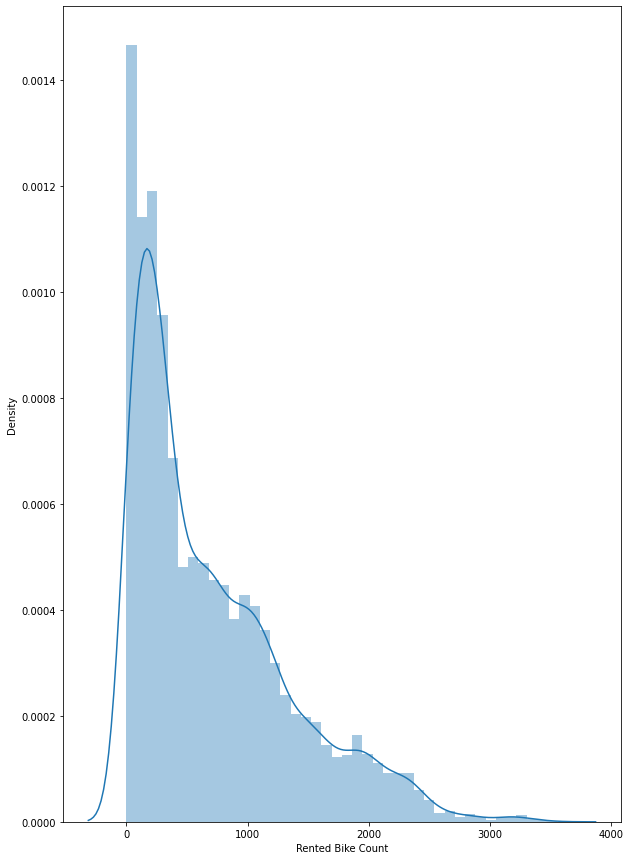

In [33]:
plt.figure(figsize=(10,15))
sns.distplot(x=data['Rented Bike Count'])
plt.xlabel('Rented Bike Count')

'Rented Bike Count' feature values are positively skewed. This should be processed to bring to a normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


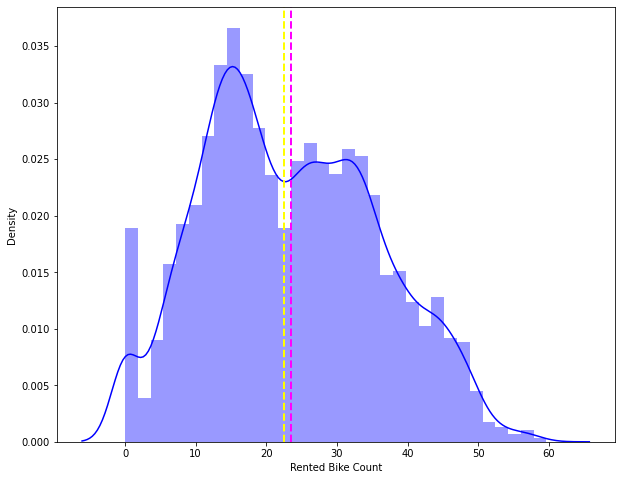

In [34]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented Bike Count']), color="b")
ax.axvline(np.sqrt(data['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented Bike Count']).median(), color='yellow', linestyle='dashed', linewidth=2)

plt.show()

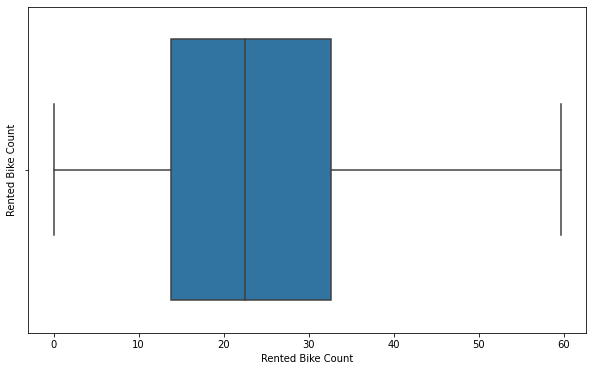

In [35]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(data['Rented Bike Count']))
plt.show()

In [36]:
#assign the numerical coulmn to variavle
num_columns=list(data.select_dtypes(['int64','float64']).columns)
num_columns

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

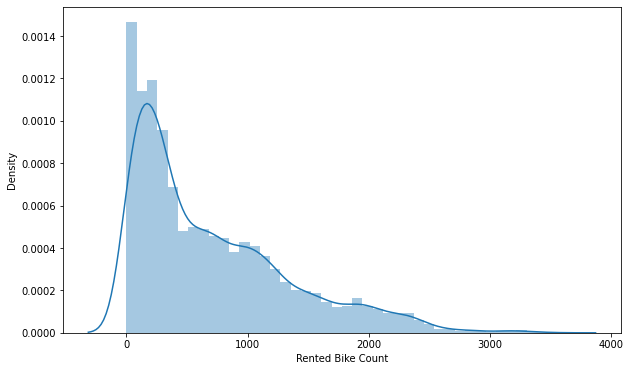

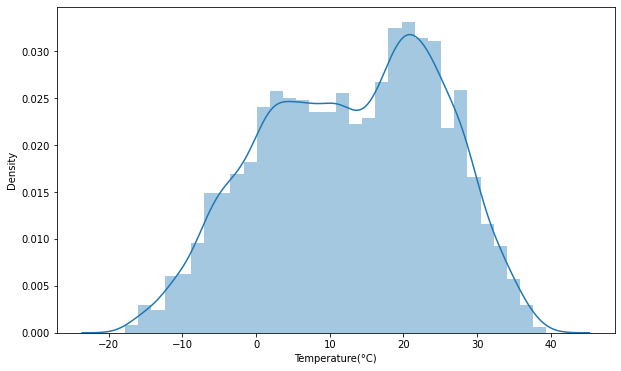

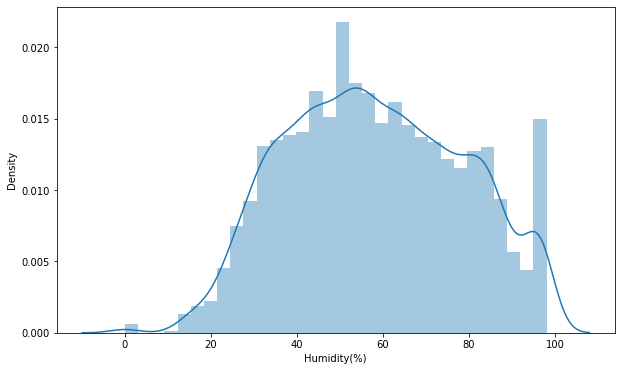

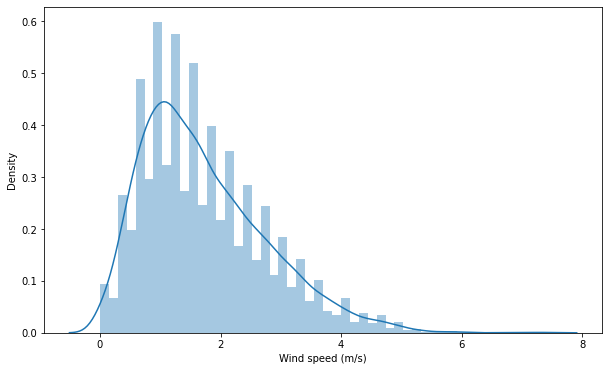

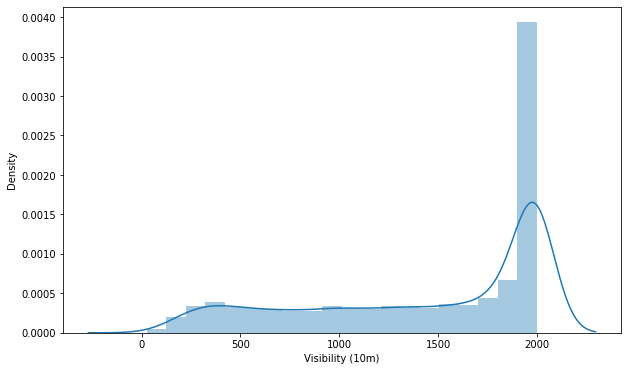

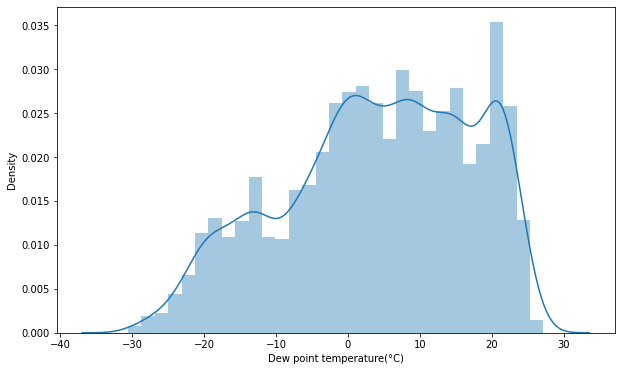

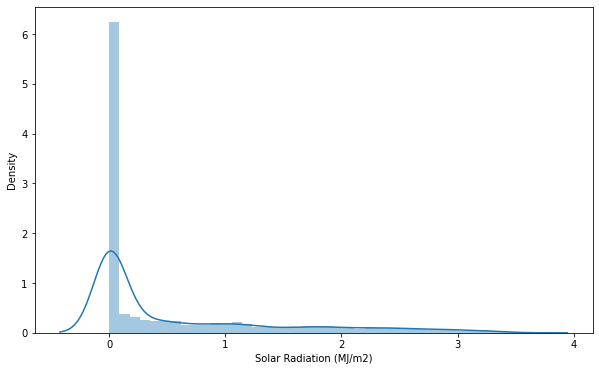

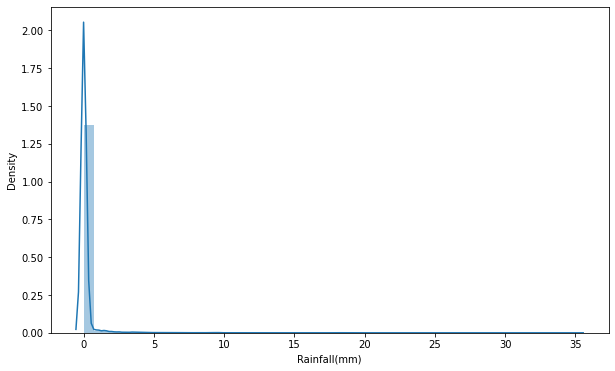

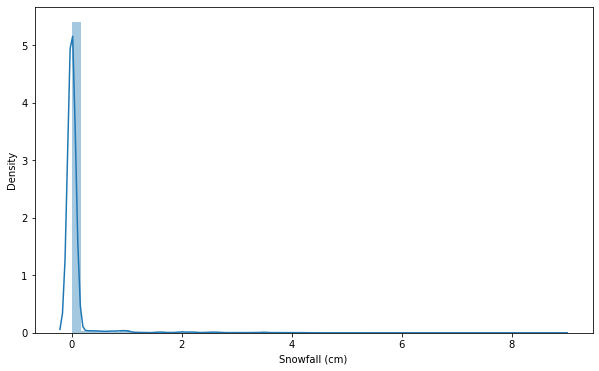

In [37]:
#printing displots to analyze the distribution of all numerical features
for col in num_columns:
  plt.figure(figsize=(10,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()

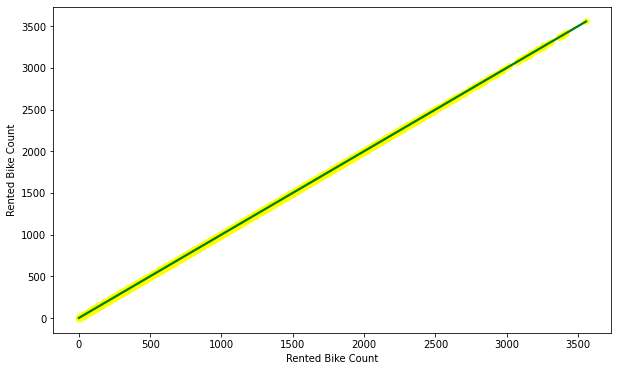

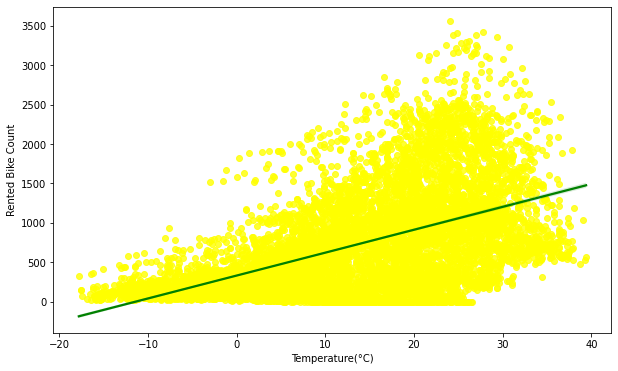

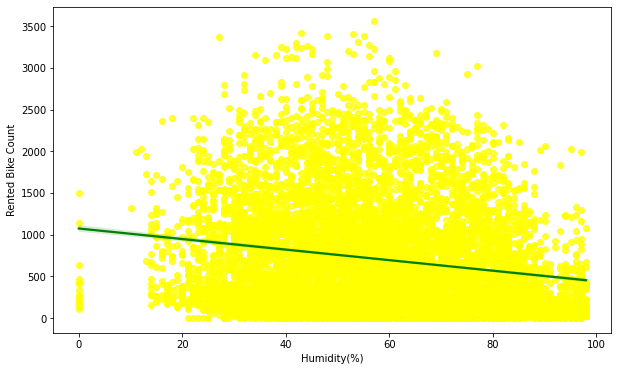

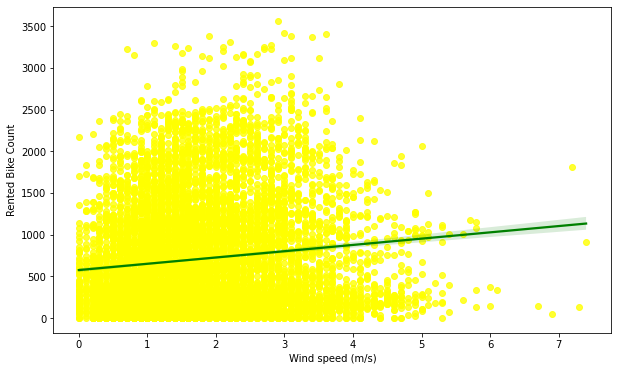

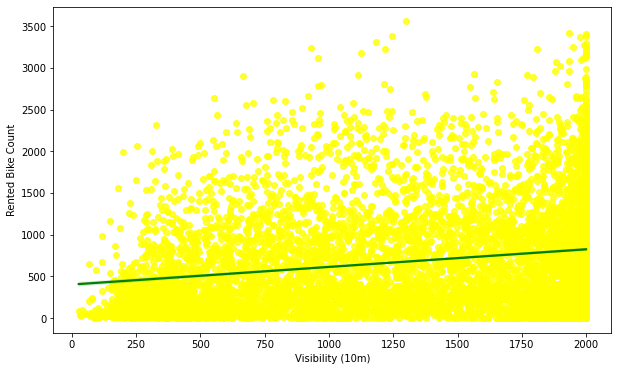

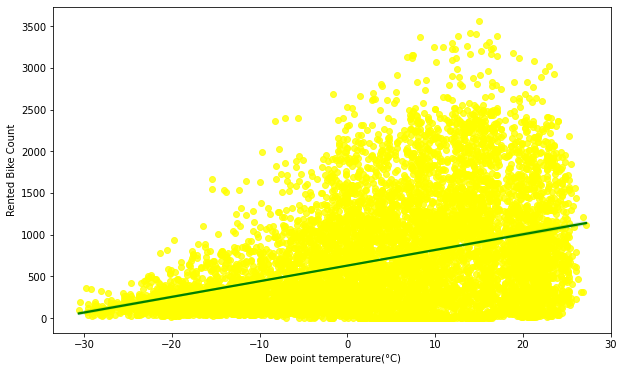

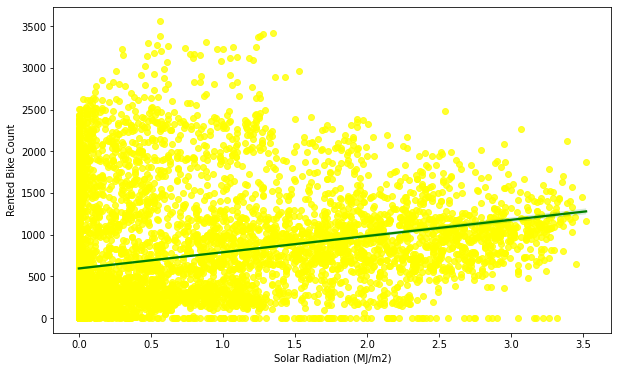

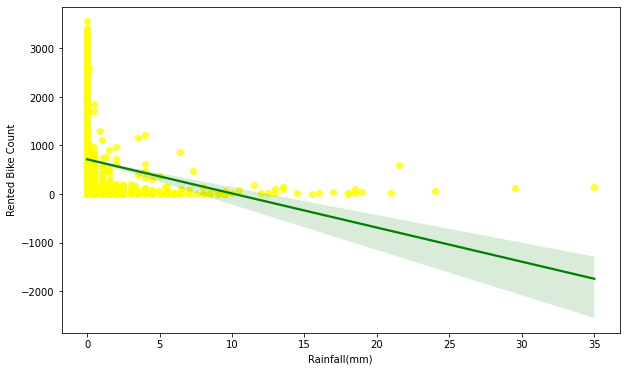

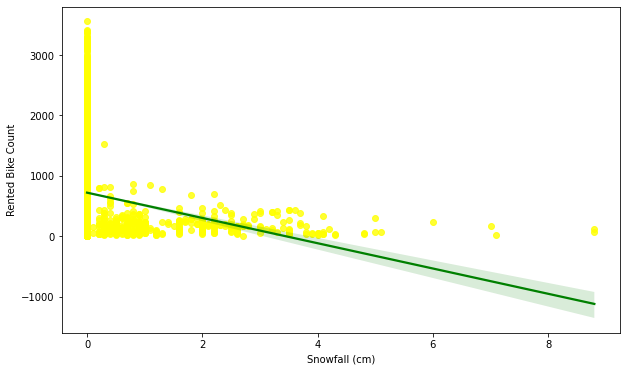

In [38]:
# #printing the regression plot for all the numerical features
for col in num_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "green"})

In [41]:
df = data.copy(deep=True)

In [42]:
#Rename the complex columns name
df= df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [43]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_filter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


**Label encoding and onehot encoding and dummies.Popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature.Every unique value in the category will be added as a feature.One-Hot Encoding is the process of creating dummy variables.**

In [44]:
# Using one-hot encoding on Functioning_Day  which had values Yes or No . Afterwards it gets converted to 0 or 1.
df = pd.get_dummies(df,columns=['Functioning_Day'],prefix= 'dmy')

In [45]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,month,weekday_filter,dmy_No,dmy_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,0,0,1


In [46]:
# applying one hot encoding on 'Holiday'variable which had values like No Holiday, Yes Holiday. Afterwards the values change to 0 0r 1.
df = pd.get_dummies(df,columns=['Holiday'])

In [47]:
# for the dummy columns that is created from Functioning_Day and Holiday column one of each category can be deleeted.

df.drop(columns=['Holiday_Holiday','dmy_No'],axis=1,inplace=True)

In [48]:
# renaming the dummy columns for clarity.
df= df.rename(columns={'dmy_Yes':'Functionig_day','Holiday_No Holiday':'No Holiday'})

In [49]:
# Seasons variable is a categorical variable.It consists of 4 different values.
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [50]:
# mapping each value to numbers 
order_label = {"Spring":1,"Summer":2,"Autumn":3,"Winter":4}
df['Season_label']= df['Seasons'].map(order_label)

In [51]:
# dropping the original column
df.drop(columns=['Seasons'],axis=1,inplace=True)

In [52]:
# Changing the datatype
# the columns like Hour , weekday_filter should be category type. But here its int64 type. So change it to category datatype
df['Functionig_day'] = df['Functionig_day'].astype('category')
df['No Holiday'] = df['No Holiday'].astype('category')
df['Season_label'] = df['Season_label'].astype('category')


In [53]:
# its important to  ward off the chances of multicolinearity among the numerical datatype independent features
# plot correlation mattix

A = df[['Rented_Bike_Count','Humidity','Temperature','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]
A.corr()

,Rented_Bike_Count,Humidity,Temperature,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,-0.199780,0.538558,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Humidity,-0.199780,1.000000,0.159371,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Temperature,0.538558,0.159371,1.000000,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Wind_speed,0.121108,-0.336683,-0.036252,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,-0.543090,0.034794,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.536894,0.912798,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,-0.461919,0.353505,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.236397,0.050282,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,0.108183,-0.218405,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


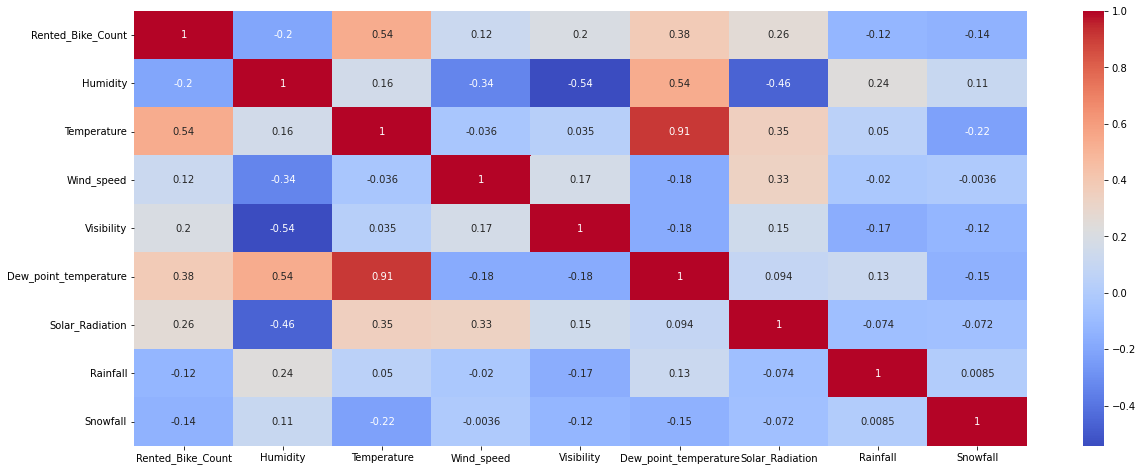

In [54]:
# using seaborn library to plot heat map of the numerical data type features.
plt.figure(figsize=(20,8))
correlation= A.corr()
sns.heatmap((correlation),annot=True,cmap='coolwarm')

'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them

In [55]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)

In [56]:
# gettinh dummies for hour column
df = pd.get_dummies(df,columns=['Hour'], drop_first=True)

In [57]:
# getting dummies for month column
df = pd.get_dummies(df,columns=['month'], drop_first=True)

In [59]:
# creating copy of the processed dataset
df1 = df.copy(deep=True)

**Separating the independent and dependent variables and assigning it to X and Y variables.**

In [60]:
#Assign the value in X and Y
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])

**Splitting the into train and test dataset.**

split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [61]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6132, 45)
(2628, 45)


**Normalizing the data by performing standardization**

In [62]:
# performing standardisation on traint and test data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# **Machine Learning Algorithms**

### **LINEAR REGRESSION**

In [66]:
# importing library to perform linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [67]:
#check the score
reg.score(X_train, y_train)

0.7427468036323804

In [68]:
#check the coefficeint
reg.coef_

array([ 6.46396289, -2.61405393, -0.35693109,  0.5742148 ,  0.95887598,
       -1.66418059, -0.06529645, -0.33389027,  4.59515282,  0.6446396 ,
       -0.50347236, -0.43649654, -1.03519515, -1.4785243 , -1.86444031,
       -1.76798602, -0.83573335,  0.47391553,  1.42719011,  0.16067843,
       -0.65298899, -0.76459172, -0.65418791, -0.6468569 , -0.71865406,
       -0.48831988,  0.02130279,  0.75375336,  1.99843787,  1.38044641,
        1.18459733,  1.29955556,  0.9958483 ,  0.24156428, -0.23989055,
        0.40497334,  0.30822712,  0.62072088,  1.22509789,  0.00813074,
       -0.17322438,  0.70405308,  1.47117626,  1.26757925,  0.352061  ])

In [69]:
#get the X_train and X-test predicted value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [70]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 40.01637993700128
RMSE : 6.325850135515485
MAE : 4.829898486882441
R2 : 0.7427468036323804
Adjusted R2 : 0.7382633048575769


**r2 score value is 0.74 that means our model is able to capture most of the data variance.**

In [71]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [72]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 39.74162529984666
RMSE : 6.304095914550052
MAE : 4.858537890871163
R2 : 0.7412622358744592
Adjusted R2 : 0.7367528635329994


**The r2_score for the test set is 0.78. This means our linear model is performing well on the data.**

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

## **LASSO REGRESSION**

In [74]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.612834317121446 0.6083944295994186


In [75]:
#get the X_train and X-test predicted value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 60.915228700218506
RMSE : 7.8048208627884925
MAE : 6.1716042185916
R2 : 0.6083944295994186
Adjusted R2 : 0.6015693906110273


 **r2 score value is 0.60 that means our model is not able  to capture most of the data variance.**

In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [78]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.467907786561454
RMSE : 7.711543800469622
MAE : 6.1309684533222315
R2 : 0.612834317121446
Adjusted R2 : 0.6060866580472652


**r2 score value is 0.61 that means our model is not able to capture most of the data variance.**



In [79]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

## **RIDGE REGRESSION**

In [80]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [81]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [82]:
#check the score
ridge.score(X_train, y_train)

0.7427468032924001

In [83]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [84]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 40.01637998988609
RMSE : 6.32585013969554
MAE : 4.829898135241497
R2 : 0.7427468032924001
Adjusted R2 : 0.7382633045116712


 **r2 score value is 0.74 that means our model is able to capture most of the data variance**

In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [86]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.741673332555706
RMSE : 6.304099724191846
MAE : 4.858543231264538
R2 : 0.7412619231576125
Adjusted R2 : 0.736752545366014


r2_score for the test set is 0.74.our model is able to capture 74% of the data variance

In [87]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

## **ELASTIC NET REGRESSION**

In [88]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [89]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [90]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [91]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 40.73169019544439
RMSE : 6.382138371693643
MAE : 4.884112085937512
R2 : 0.7381482904568073
Adjusted R2 : 0.7335846471843659


 **r2 score value is 0.73 that means our model is able to capture most of the data variance.**

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [93]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 40.4886291965426
RMSE : 6.36306759327155
MAE : 4.915878375441202
R2 : 0.7363988686476306
Adjusted R2 : 0.731804735839398


 **r2_score for the test set is 0.73. This means our linear model is able to capture 73 % of variance.**

In [94]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

## **DECISION TREE**

In [95]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [96]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [97]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6599006380920589
MSE : 52.90330878140607
RMSE : 7.273466077559314
MAE : 5.400428530855217
R2 : 0.6599006380920589
Adjusted R2 : 0.6539732673384349


**r2 score value is 0.70 that means our model is able to capture most of the data variance.**

In [98]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 63.08587898588933
RMSE : 7.942661958429889
MAE : 5.910931896213467
R2 : 0.5892795235838926
Adjusted R2 : 0.5821213433210247


 **r2_score for the test set is 0.66. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

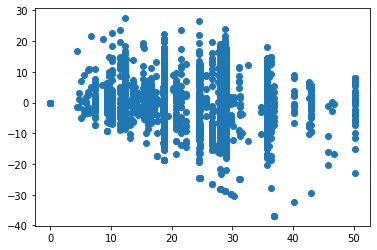

In [100]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

## **RANDOM FOREST**

In [101]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [103]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9863878165524811
MSE : 2.117409277316319
RMSE : 1.4551320480686003
MAE : 0.9591473543804837
R2 : 0.9863878165524811
Adjusted R2 : 0.986150578653512


**r2_score for the test set is 0.98. This means our linear model is performing well on the data.**

In [104]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [105]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 15.955161257220576
RMSE : 3.9943912248577473
MAE : 2.629324812004367
R2 : 0.8961239577191717
Adjusted R2 : 0.8943135696856175


 **r2_score for the test set is 0.89. This means our linear model is performing well on the data.**

In [106]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

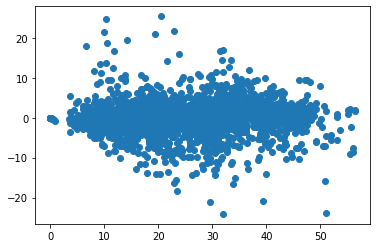

In [107]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

## **GRADIENT BOOSTING**

In [108]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [109]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.866697463178343
MSE : 20.73554395179891
RMSE : 4.55362975567831
MAE : 3.4231265376158757
R2 : 0.866697463178343
Adjusted R2 : 0.8643742198952389


 r2 score value is 0.86 that means our model is able to capture most of the data variance

In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [112]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 23.199432337762484
RMSE : 4.816578903927816
MAE : 3.6388106763787174
R2 : 0.8489601467789594
Adjusted R2 : 0.8463277713355253


 **r2_score for the test set is 0.86. This means our linear model is performing well on the data.**

In [113]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

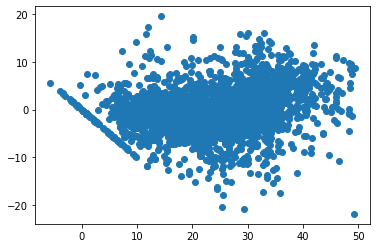

In [114]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

## **Hyperparameter tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

## **Gradient Boosting Regressor with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [115]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [116]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing Gradient Boosting Regressor**

In [117]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [118]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [119]:
gb_optimal_model = gb_grid.best_estimator_

In [120]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [121]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9370696440320361
MSE : 9.788974712625782
RMSE : 3.1287337235095256
MAE : 2.170320915758121
R2 : 0.9370696440320361
Adjusted R2 : 0.93597287175529


In [123]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [124]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 15.34708460909192
RMSE : 3.917535527483053
MAE : 2.7334797448993013
R2 : 0.9000828393996945
Adjusted R2 : 0.8983414481421369


In [125]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

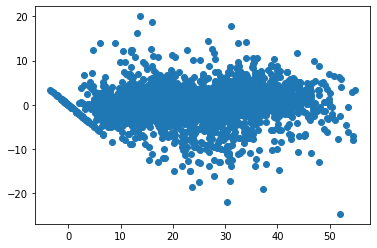

In [126]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [127]:
gb_optimal_model.feature_importances_

array([3.18727175e-01, 1.60071424e-01, 6.12068087e-03, 6.86209256e-03,
       3.69217001e-02, 4.42517427e-02, 1.02460529e-03, 1.02321889e-02,
       1.63634592e-01, 2.15303571e-03, 2.64146232e-02, 1.02555477e-03,
       1.06814766e-02, 2.14417895e-02, 2.97812210e-02, 2.55998956e-02,
       6.72946726e-03, 2.72018397e-03, 1.04633190e-02, 2.51621533e-04,
       3.82575871e-03, 1.88139401e-03, 4.76304300e-05, 1.41872775e-04,
       1.39622061e-04, 2.41309847e-04, 1.72570025e-03, 1.00414899e-02,
       3.22242586e-02, 1.75504316e-02, 1.25225917e-02, 1.50283520e-02,
       9.26810404e-03, 2.15030360e-03, 8.99993276e-05, 4.20175468e-04,
       4.66006670e-05, 9.73083022e-04, 1.52069816e-03, 1.93568029e-04,
       7.56694037e-04, 7.99412451e-04, 1.35823021e-03, 1.63839767e-03,
       3.05931675e-04])

In [128]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [129]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [130]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
2,Wind_speed,0.01
3,Visibility,0.01
4,Solar_Radiation,0.04


In [131]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
8,Functionig_day,0.16
4,Solar_Radiation,0.04
5,Rainfall,0.04
28,Hour_18,0.03
15,Hour_5,0.03
14,Hour_4,0.03
10,Season_label,0.03
13,Hour_3,0.02


In [132]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [133]:
features = X.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

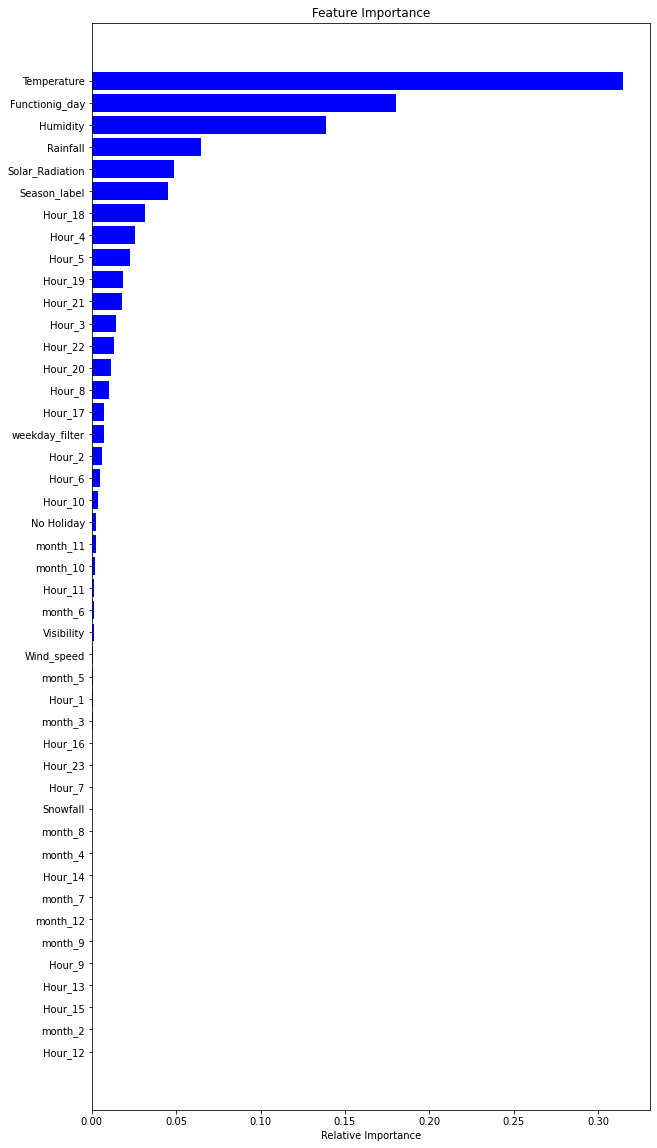

In [134]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

In [135]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.830  40.016  6.326   
             1                Lasso regression   6.172  60.915  7.805   
             2                Ridge regression   4.830  40.016  6.326   
             3          Elastic net regression   4.884  40.732  6.382   
             4        Dicision tree regression   5.400  52.903  7.273   
             5        Random forest regression   0.959   2.117  1.455   
             6    Gradient boosting regression   3.423  20.736  4.554   
             7  Gradient Boosting gridsearchcv   2.170   9.789  3.129   
Test set     0               Linear regression   4.859  39.742  6.304   
             1                Lasso regression   6.131  59.468  7.712   
             2                Ridge regression   4.859  39.742  6.304   
             3      Elastic net regression Test  4.916  40.489  6.363   
             4        Random forest regression   2.629  15.955  3.994   
             5    Gradient boosting regression   3.639  23.199  4.817   
             6  Gradient Boosting gridsearchcv   2.733  15.347  3.918   

                R2_score  Adjusted R2  
Training set 0     0.743         0.74  
             1     0.608         0.60  
             2     0.743         0.74  
             3     0.738         0.73  
             4     0.660         0.65  
             5     0.986         0.99  
             6     0.867         0.86  
             7     0.937         0.94  
Test set     0     0.741         0.74  
             1     0.613         0.61  
             2     0.741         0.74  
             3     0.736         0.73  
             4     0.896         0.89  
             5     0.849         0.85  
             6     0.900         0.90



*   Initially in the EDA part visual interpretation of various independent features were done with respect to the dependent variable(Rented Bike Count).


*   Correlation matrix was drawn. From which the highly correlated variables were identified. Hence those columns were dropped from the dataset.
*   Outlier treatment was also done on the target variable .


*   In the data processing stage one hot encoding was performed on the categorical values. After which the redundant columns were dropped. 

*   The data was split into train and test data in 7:3 ratio.
*   The data set was trained using Regression Models. The following Machine Learning algorithms were used: Linear Regression, Lasso, Ridge,Elastic Net,Decision Tree, Random Forest, Gradient Boost.

*   Further hyperparameter tuning(Grid SearchCV) was used to reach till the best
model for the data prediction.
*   It can be concluded the Gradient Boosting with gridsearchcv is the best fit model as it  gave the best R Score i.e 0.90 for the test data.


*   From feature importance graph it can be concluded that Temperature variable affects the most. 
*   Hour 18 i.e 6pm is the time rented bike count per hour increases the most.






